In [ ]:
# https://colab.research.google.com/drive/1kSAAY8LerTBX-Hi22_K8sLppYxemeB1o?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!cp /content/drive/MyDrive/abdulla/Number/anotation_28x28/Test.csv .
!cp /content/drive/MyDrive/abdulla/Number/anotation_28x28/Train.csv .

!rm -rf sample_data

Mounted at /content/drive


In [ ]:
import pandas as pd 
import seaborn as sns

train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    5925
1    5924
2    5924
3    5924
4    5924
5    5924
6    5924
7    5924
8    5924
9    5924
Name: label, dtype: int64

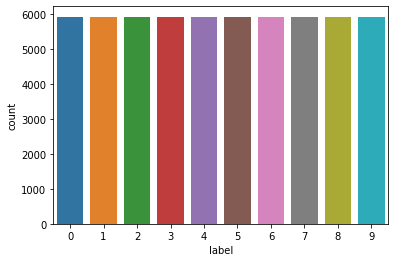

In [ ]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [ ]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
from keras.utils import to_categorical

# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(Y_train, num_classes = 10, dtype = 'float32')
y_test = to_categorical(Y_val, num_classes = 10, dtype = 'float32')

In [ ]:
y_train.shape

(53316, 10, 10)

In [ ]:
# # # Reshaping the array to include the RGB value. Here RGB value is 1 since it is a b&w image

# x_train = X_train.values.reshape(-1,28,28,1)
# x_test = X_val.values.reshape(-1,28,28,1)

In [ ]:
# Converting the arrays to float so that we can get decimal points after division
x_train = X_train.astype('float32')
x_test = X_val.astype('float32')

In [ ]:
# Normalizing the RGB codes by dividing it to the maximum RGB value.
x_train /= 255
x_test /= 255

In [ ]:
#Checking the shapes of x_train and y_train 
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (53316, 28, 28, 1)
y_train shape: (53316, 10, 10)
Number of images in x_train 53316
Number of images in x_test 5925


In [ ]:
#Initializing the input shape
input_shape = (28, 28, 1)

In [ ]:
import tensorflow as tf
from tensorflow import keras

# load the data
X_train, X_val, Y_train, Y_val

# (train_img,train_label),(test_img,test_label) = keras.datasets.mnist.load_data()
# train_img = train_img.reshape([-1, 28, 28, 1])
# test_img = test_img.reshape([-1, 28, 28, 1])
# train_img = train_img/255.0
# test_img = test_img/255.0
# train_label = keras.utils.to_categorical(train_label)
# test_label = keras.utils.to_categorical(test_label)

# define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (5, 5), padding="same"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x=X_train,y=Y_train, epochs=30)
model.evaluate(X_val, Y_val)
model.evaluate(X_train, Y_train)

Epoch 1/30
1667/1667 [==============================] - 9s 4ms/step - loss: 0.1805 - accuracy: 0.9433
Epoch 2/30
1667/1667 [==============================] - 10s 6ms/step - loss: 0.0587 - accuracy: 0.9824
Epoch 3/30
1667/1667 [==============================] - 7s 4ms/step - loss: 0.0445 - accuracy: 0.9870
Epoch 4/30
1667/1667 [==============================] - 8s 5ms/step - loss: 0.0412 - accuracy: 0.9879
Epoch 5/30
1667/1667 [==============================] - 7s 4ms/step - loss: 0.0316 - accuracy: 0.9909
Epoch 6/30
1667/1667 [==============================] - 8s 5ms/step - loss: 0.0351 - accuracy: 0.9904
Epoch 7/30
1667/1667 [==============================] - 8s 5ms/step - loss: 0.0303 - accuracy: 0.9917
Epoch 8/30
1667/1667 [==============================] - 8s 5ms/step - loss: 0.0263 - accuracy: 0.9932
Epoch 9/30
1667/1667 [==============================] - 8s 5ms/step - loss: 0.0291 - accuracy: 0.9930
Epoch 10/30
1667/1667 [==============================] - 7s 4ms/step - loss: 0.02

[0.018729358911514282, 0.9977867603302002]

In [ ]:
model.save("model.h5")

In [ ]:
!cp -r /content/drive/MyDrive/abdulla/Number/ .